In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp

In [9]:
num_hidden_states = 2
num_observation_states = 6

# Generation of random matrices of transition probabilities and emission probabilities
M = np.random.rand(num_hidden_states, num_hidden_states)
M = M / np.sum(M, axis=1, keepdims=True)
E = np.random.rand(num_hidden_states, num_observation_states)
E = E / np.sum(E, axis=1, keepdims=True)


M = np.array([[0.95, 0.05],
              [0.1, 0.9]])
E = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])



eigval, eigvec = np.linalg.eig(M)
idx = 0
for i in range(len(eigval)):
    if np.abs(eigval[i] - 1.0) < 1e-9:
        idx = i
        break
pi = np.real(eigvec[::, idx])/np.sum(np.real(eigvec[::,idx]))
print(pi)


def generate_seq(M, E, L):
    # Initial distribution (stationar distribution of M)
    #pi = np.ones(num_hidden_states) / num_hidden_states
    hidden_seq = [np.random.choice(np.arange(num_hidden_states), p=pi)]
    
    for _ in range(1, L):
        hidden_seq.append(np.random.choice(np.arange(num_hidden_states), p=M[hidden_seq[-1]]))

    observation_seq = [np.random.choice(np.arange(num_observation_states), p=E[hidden_seq[0]])]
    for state in hidden_seq[1:]:
        observation_seq.append(np.random.choice(np.arange(num_observation_states), p=E[state]))

    return hidden_seq, observation_seq


L = 100 # Length of sequences
hidden_seq, observation_seq = generate_seq(M, E, L)
print(f"Hidden sequence: {hidden_seq}\n")
print(f"Observation sequence: {observation_seq}")

[0.5 0.5]
Hidden sequence: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Observation sequence: [2, 3, 4, 5, 0, 0, 5, 5, 1, 2, 4, 1, 0, 1, 1, 0, 2, 5, 3, 4, 4, 2, 4, 2, 1, 1, 2, 5, 1, 0, 3, 3, 3, 3, 3, 2, 5, 5, 3, 2, 5, 5, 3, 5, 5, 5, 5, 5, 0, 2, 0, 5, 1, 5, 4, 4, 0, 1, 4, 5, 5, 3, 1, 5, 1, 0, 5, 1, 3, 4, 4, 4, 4, 5, 0, 0, 1, 5, 1, 5, 3, 3, 1, 2, 1, 5, 0, 0, 5, 5, 1, 3, 5, 2, 4, 3, 1, 3, 4, 2]


In [3]:
def viterbi(M, E, observation_seq):
    num_hidden_states = M.shape[0]
    T = len(observation_seq)
    #pi = np.ones(num_hidden_states) / num_hidden_states

    viterbi_logs = np.full((num_hidden_states, T), -np.inf)
    backpointer = np.zeros((num_hidden_states, T), dtype=int)

    # Calculation of log probabilities of hidden states at the first time step
    viterbi_logs[:, 0] = np.log(pi) + np.log(E[:, observation_seq[0]])

    # Forward pass of the Viterbi algorithm to compute the most likely path and its log probability
    for t in range(1, T):
        for s in range(num_hidden_states):
            log_probs = viterbi_logs[:, t - 1] + np.log(M[:, s]) + np.log(E[s, observation_seq[t]])
            backpointer[s, t] = np.argmax(log_probs)
            viterbi_logs[s, t] = np.max(log_probs)
    
    # Computing the log probability of the most likely path
    best_path_log_prob = logsumexp(viterbi_logs[:, -1])

    # Backtracking to reconstruct the best path
    best_path = [np.argmax(viterbi_logs[:, -1])]
    for t in range(T - 2, -1, -1):
        best_path.insert(0, backpointer[best_path[0], t + 1])
    
    return best_path, best_path_log_prob


best_path, best_path_log_prob = viterbi(M, E, observation_seq)
print(f"The most likely path: {best_path}\n")
print(f"The log probability of the most likely path: {best_path_log_prob}")

The most likely path: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

The log probability of the most likely path: -178.6094018940385


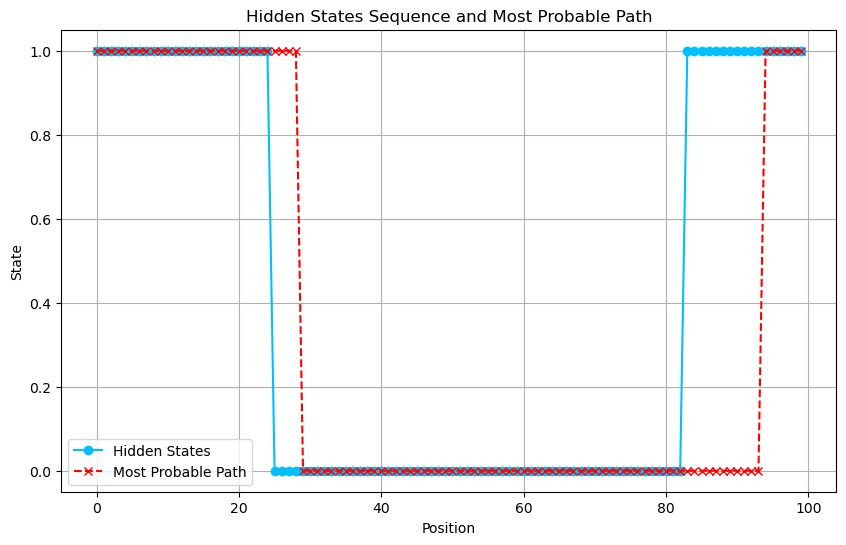

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_seq, label="Hidden States", marker="o", color="deepskyblue")
plt.plot(best_path, label="Most Probable Path", linestyle="--", marker="x", color="red")
plt.title("Hidden States Sequence and Most Probable Path")
plt.xlabel("Position")
plt.ylabel("State")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def forward_algorithm(M, E, observation_seq):
    num_hidden_states = M.shape[0]
    T = len(observation_seq)
    #pi = np.ones(num_hidden_states) / num_hidden_states

    log_alpha = np.zeros((num_hidden_states, T))
    log_pi = np.log(pi)
    log_alpha[:, 0] = log_pi + np.log(E[:, observation_seq[0]])

    for t in range(1, T):
        for s in range(num_hidden_states):
            log_alpha[s, t] = logsumexp(log_alpha[:, t - 1] + np.log(M[:, s])) + np.log(E[s, observation_seq[t]])

    log_p_epsilon = logsumexp(log_alpha[:, -1])

    return np.exp(log_p_epsilon), log_alpha


def backward_algorithm(M, E, observation_seq):
    num_hidden_states = M.shape[0]
    T = len(observation_seq)
    #pi = np.ones(num_hidden_states) / num_hidden_states

    log_beta = np.zeros((num_hidden_states, T))
    log_beta[:, -1] = 0

    for t in range(T - 2, -1, -1):
        for s in range(num_hidden_states):
            log_beta[s, t] = logsumexp(np.log(M[s, :]) + np.log(E[:, observation_seq[t + 1]]) + log_beta[:, t + 1])

    log_p_epsilon = logsumexp(np.log(pi) + np.log(E[:, observation_seq[0]]) + log_beta[:, 0])

    return np.exp(log_p_epsilon), log_beta


p_epsilon_forward = forward_algorithm(M, E, observation_seq)[0]
p_epsilon_backward = backward_algorithm(M, E, observation_seq)[0]

print(f"Forward algorithm: P(ε) = {p_epsilon_forward}")
print(f"Backward algorithm: P(ε) = {p_epsilon_backward}")

Forward algorithm: P(ε) = 5.565696615741427e-76
Backward algorithm: P(ε) = 5.565696615741742e-76


In [6]:
def posterior_decoding(M, E, observation_seq):
    p_epsilon_forward, log_alpha = forward_algorithm(M, E, observation_seq)
    p_epsilon_backward, log_beta = backward_algorithm(M, E, observation_seq)
    
    num_hidden_states = M.shape[0]
    T = len(observation_seq)
    
    posterior_probs = np.zeros((num_hidden_states, T))
    for t in range(T):
        log_posterior = log_alpha[:, t] + log_beta[:, t] - logsumexp(log_alpha[:, t] + log_beta[:, t])
        posterior_probs[:, t] = np.exp(log_posterior)
    
    return posterior_probs


posterior_probs = posterior_decoding(M, E, observation_seq)
print(posterior_probs)

[[0.12644631 0.14594478 0.12602083 0.15319409 0.26073852 0.30561055
  0.47427908 0.55973736 0.59216388 0.58300966 0.52904199 0.4112029
  0.18787899 0.11407462 0.09941559 0.12595178 0.22617702 0.26653767
  0.26128658 0.20856937 0.08976966 0.05089436 0.04434029 0.06208191
  0.12584403 0.1439205  0.1226948  0.14777436 0.24986934 0.55399605
  0.72223898 0.81401099 0.86172017 0.88221443 0.88273105 0.86345247
  0.91214458 0.93821257 0.950862   0.95455987 0.95061201 0.93762431
  0.91101031 0.94197616 0.95889717 0.96774877 0.9716568  0.97200131
  0.96890399 0.96127103 0.94640697 0.91906275 0.94742944 0.96321763
  0.97200272 0.97688706 0.97959547 0.98108441 0.98187967 0.98226209
  0.98236672 0.98223051 0.98180535 0.98094111 0.97933258 0.97641174
  0.97114713 0.96167962 0.94466588 0.91409773 0.94042252 0.95360102
  0.95828703 0.95613537 0.94638621 0.92559675 0.88642546 0.9101932
  0.91706058 0.90945275 0.88468309 0.83400451 0.73952051 0.73770717
  0.82634405 0.87272703 0.89323569 0.89511238 0.87

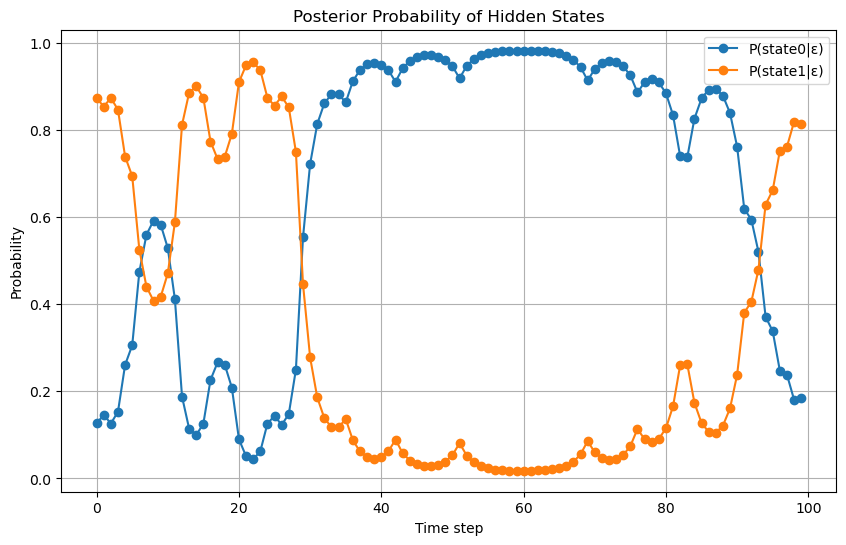

In [7]:
plt.figure(figsize=(10, 6))
for i in range(num_hidden_states):
    plt.plot(range(len(observation_seq)), posterior_probs[i], label=f"P(state{i}|ε)", marker="o")
plt.title("Posterior Probability of Hidden States")
plt.xlabel('Time step')
plt.ylabel('Probability')

plt.legend()
plt.grid(True)
plt.show()

In [8]:
'''
num_hidden_states = 3
num_observation_states = 2

# Generation of random matrices of transition probabilities and emission probabilities
M = np.random.rand(num_hidden_states, num_hidden_states)
M = M / np.sum(M, axis=1, keepdims=True)
E = np.random.rand(num_hidden_states, num_observation_states)
E = E / np.sum(E, axis=1, keepdims=True)

M = np.array([[0.95, 0.05],
              [0.1, 0.9]])
E = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])

eigval, eigvec = np.linalg.eig(np.transpose(M))
idx = 0
for i in range(len(eigval)):
    if np.abs(eigval[i] - 1.0) < 1e-9:
        idx = i
        break
pi = np.real(eigvec[::, idx])/np.sum(np.real(eigvec[::,idx]))

for l in [100, 500, 1000]:
    print("----------------------------------------------------------------------------------------------------")
    print(f"L = {l}")
    
    hidden_seq, observation_seq = generate_seq(M, E, l)
    
    best_path, best_path_log_prob = viterbi(M, E, observation_seq)
    print(f"The log probability of the most likely path: {best_path_log_prob}")
    
    p_epsilon_forward = forward_algorithm(M, E, observation_seq)[0]
    p_epsilon_backward = backward_algorithm(M, E, observation_seq)[0]
    print(f"Forward algorithm: P(ε) = {p_epsilon_forward}")
    print(f"Backward algorithm: P(ε) = {p_epsilon_backward}")
    print("----------------------------------------------------------------------------------------------------")
    
    posterior_probs = posterior_decoding(M, E, observation_seq)
    
    plt.figure(figsize=(15, 5))
    plt.plot(hidden_seq, label="Hidden States", marker="o", color="deepskyblue")
    plt.plot(best_path, label="Most Probable Path", linestyle="--", marker="x", color="red")
    plt.title(f"Hidden States Sequence and Most Probable Path (L = {l})")
    plt.xlabel("Position")
    plt.ylabel("State")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show();

    plt.figure(figsize=(15, 5))
    for i in range(num_hidden_states):
        plt.plot(range(len(observation_seq)), posterior_probs[i], label=f"P(state{i}|ε)", marker="o")
        plt.title(f"Posterior Probability of Hidden States (L = {l})")
        plt.xlabel('Time step')
        plt.ylabel('Probability')
        plt.legend(loc="upper right")
        plt.grid(True)
    plt.show();
'''

'\nnum_hidden_states = 3\nnum_observation_states = 2\n\n# Generation of random matrices of transition probabilities and emission probabilities\nM = np.random.rand(num_hidden_states, num_hidden_states)\nM = M / np.sum(M, axis=1, keepdims=True)\nE = np.random.rand(num_hidden_states, num_observation_states)\nE = E / np.sum(E, axis=1, keepdims=True)\n\nM = np.array([[0.95, 0.05],\n              [0.1, 0.9]])\nE = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],\n              [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])\n\neigval, eigvec = np.linalg.eig(np.transpose(M))\nidx = 0\nfor i in range(len(eigval)):\n    if np.abs(eigval[i] - 1.0) < 1e-9:\n        idx = i\n        break\npi = np.real(eigvec[::, idx])/np.sum(np.real(eigvec[::,idx]))\n\nfor l in [100, 500, 1000]:\n    print("----------------------------------------------------------------------------------------------------")\n    print(f"L = {l}")\n    \n    hidden_seq, observation_seq = generate_seq(M, E, l)\n    \n    best_path, best_path_log_prob =